## 1. Loading the Data and Initial Exploration
First, we load the dataset and take a look at the first few rows and the data types of each column. This helps us to get a feel for the data and what we are working with.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('twitchdata-update.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display the data types and non-null counts
print("\nDataset Info:")
df.info()

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

## 2. 1-Dimensional Histograms and Descriptive Statistics
Here we will create histograms for each numerical variable and bar charts for categorical variables to understand their distributions.

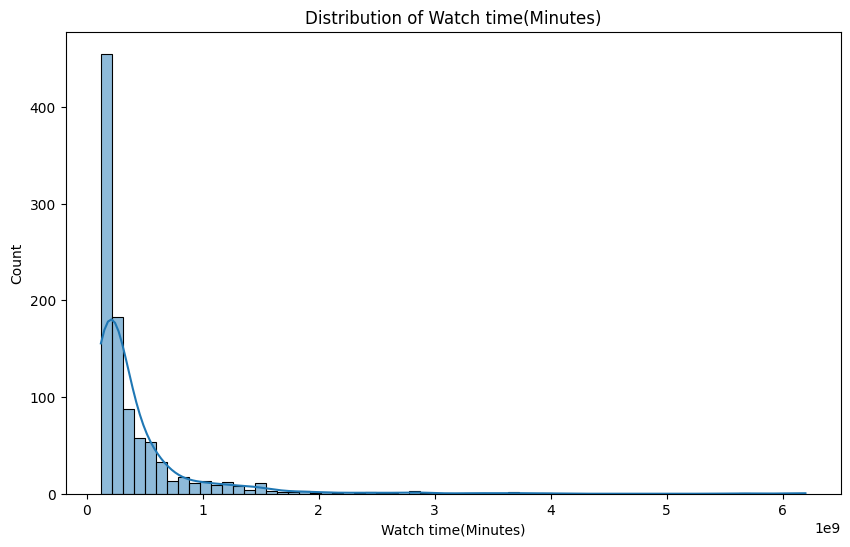


Descriptive Statistics for Watch time(Minutes):
Mean: 418427930.13
Median: 234990787.5
Min: 122192850
Max: 6196161750


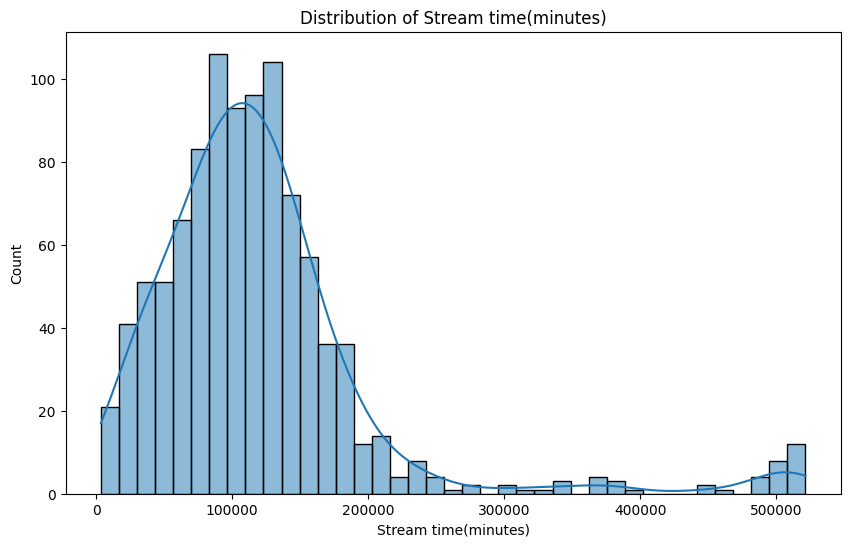


Descriptive Statistics for Stream time(minutes):
Mean: 120515.16
Median: 108240.0
Min: 3465
Max: 521445


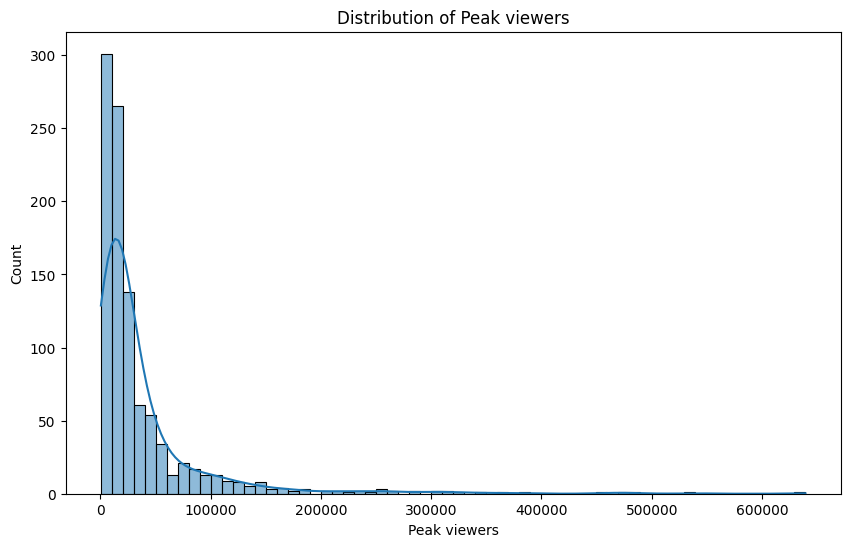


Descriptive Statistics for Peak viewers:
Mean: 37065.051
Median: 16676.0
Min: 496
Max: 639375


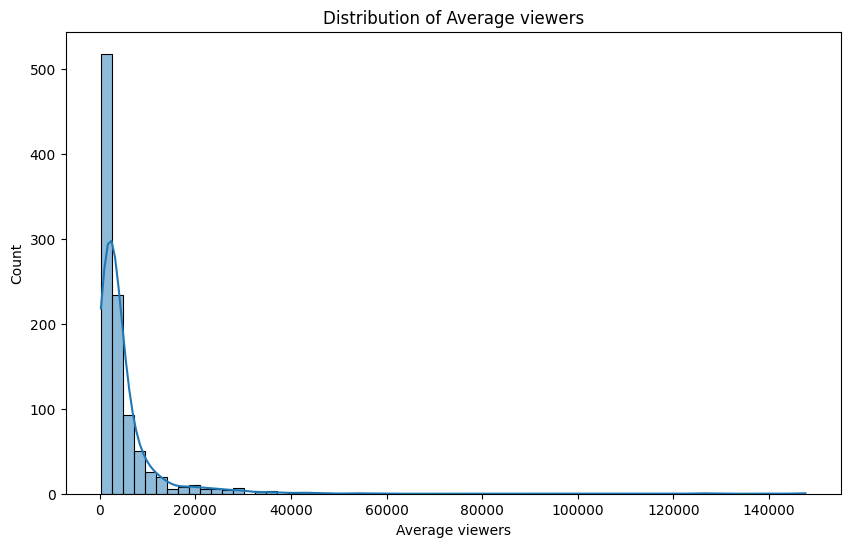


Descriptive Statistics for Average viewers:
Mean: 4781.04
Median: 2425.0
Min: 235
Max: 147643


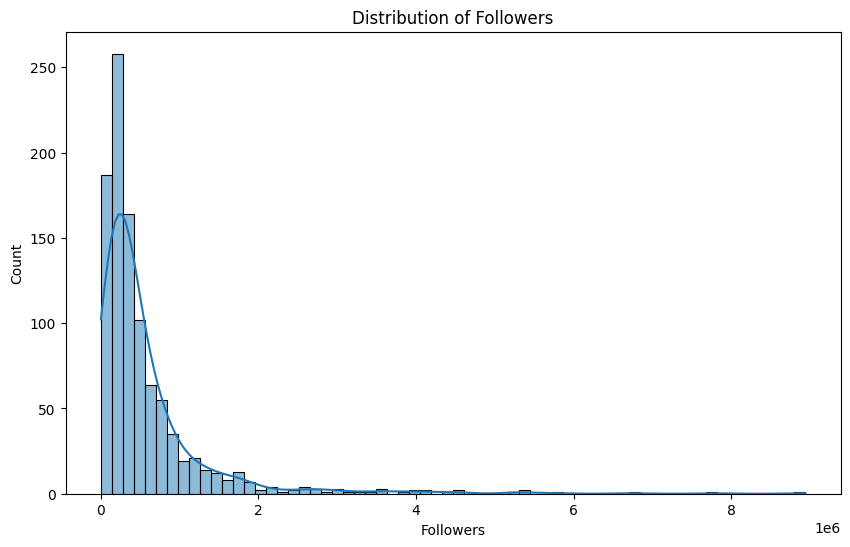


Descriptive Statistics for Followers:
Mean: 570054.068
Median: 318063.0
Min: 3660
Max: 8938903


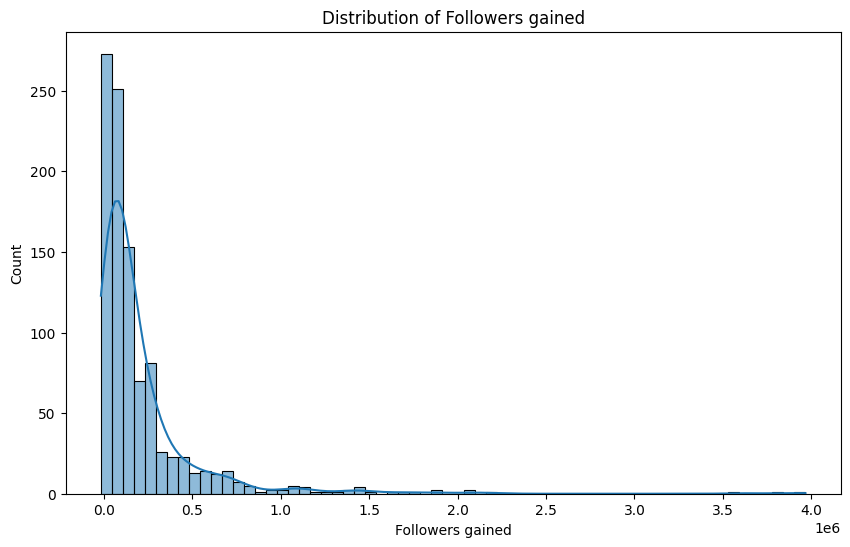


Descriptive Statistics for Followers gained:
Mean: 205518.534
Median: 98352.0
Min: -15772
Max: 3966525


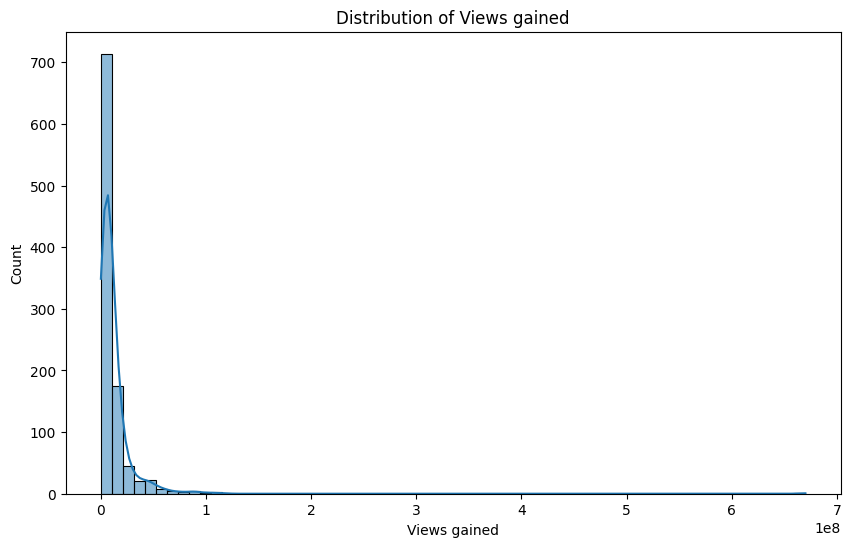


Descriptive Statistics for Views gained:
Mean: 11668165.613
Median: 6456323.5
Min: 175788
Max: 670137548


In [3]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot histograms for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Calculate and print descriptive statistics
    print(f"\nDescriptive Statistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")

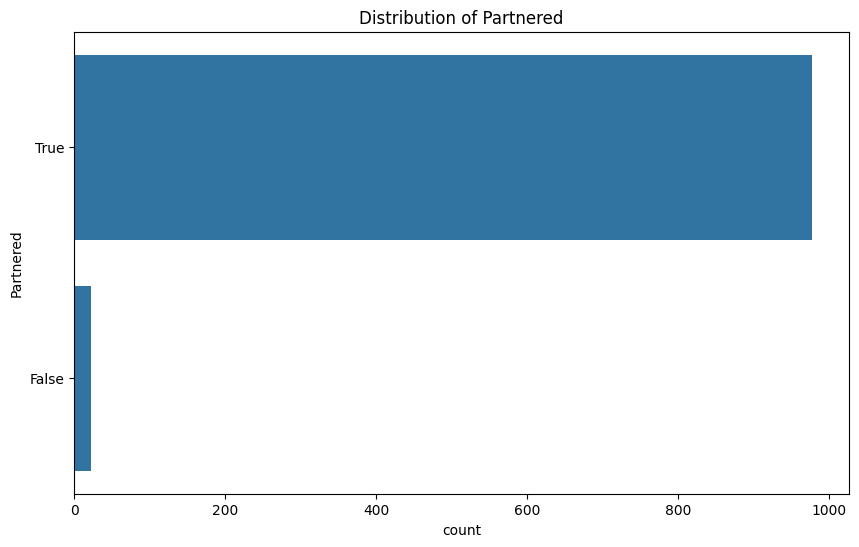

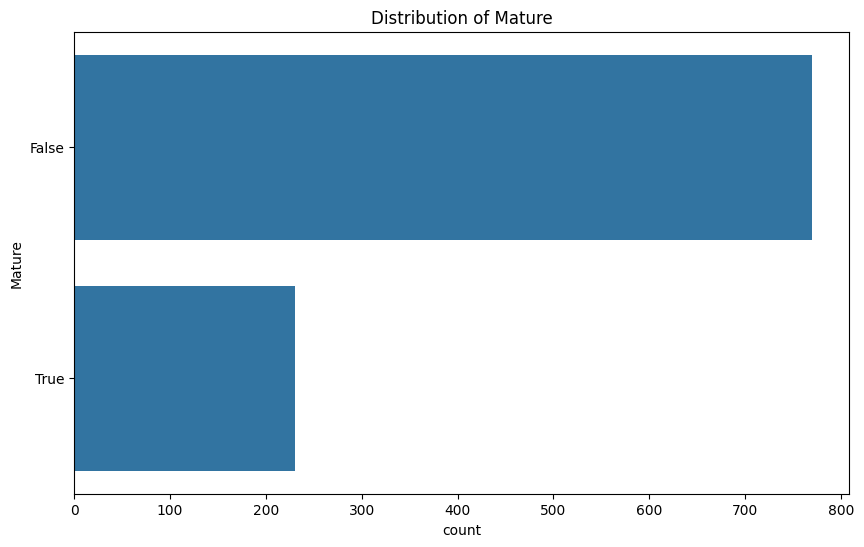

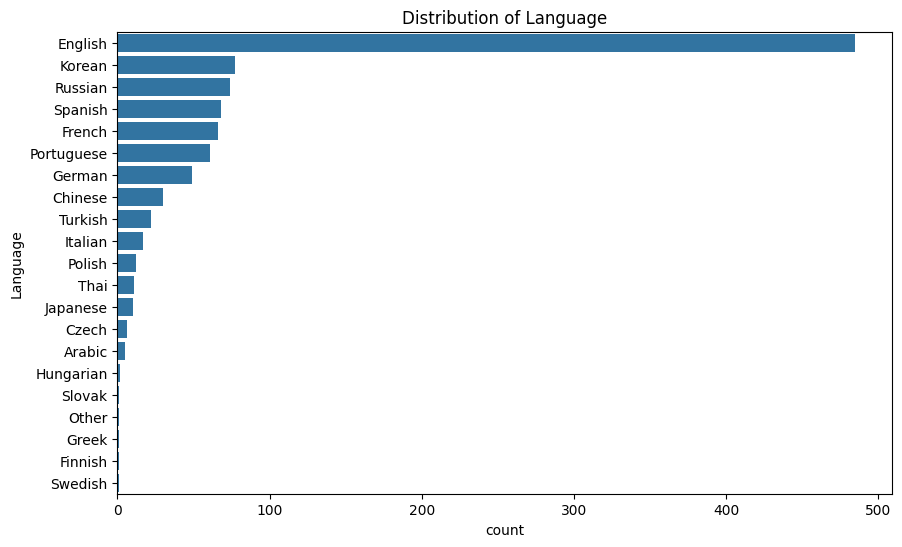

In [5]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Plot bar charts for each categorical variable
for col in categorical_cols:
    if col == 'Channel':  # Skip high cardinality columns
        continue
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

## 3. Combined Box Plot
A box plot is a good way to visualize the distribution of numerical variables and compare them side-by-side. It also helps in identifying outliers.


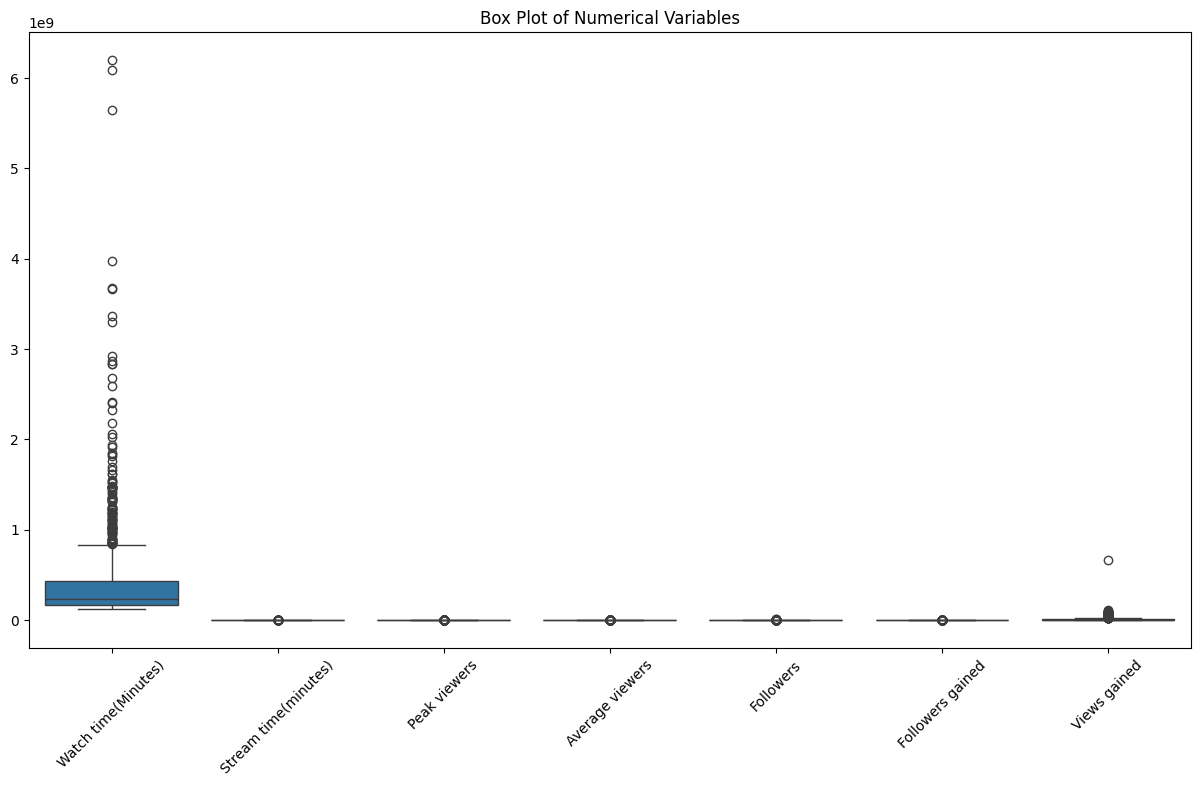

In [6]:
# Create a box plot for all numerical variables
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

This chart is hard to read because the "Watch time" values are so much larger than everything else. To show these numbers, the chart's scale has to be massive, which shrinks all the other variables into flat lines at the bottom. This makes it impossible to see any details for categories like "Followers" or "Viewers." To fix this, we can adjust the numbers so they are on a more similar scale, which will allow us to see and compare all the variables clearly.

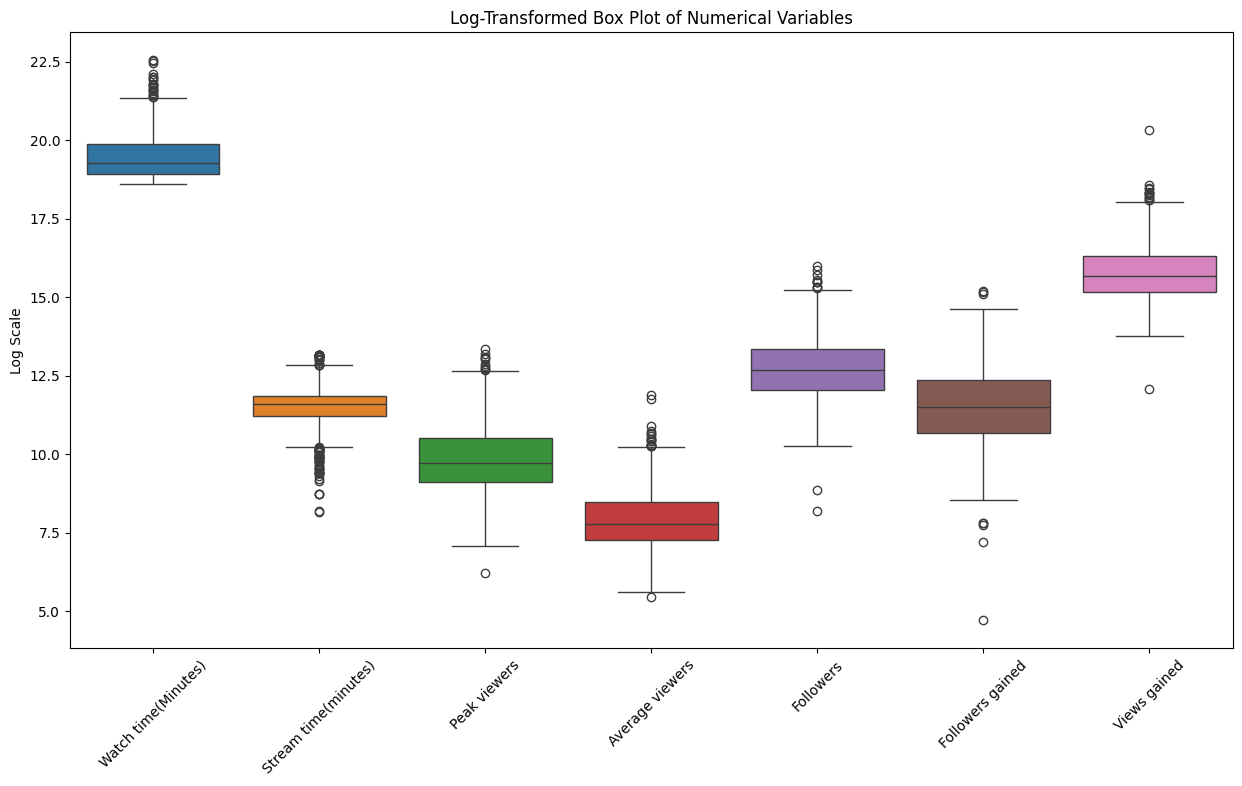

In [7]:
# Apply a log transformation
# We use np.log1p which calculates log(1 + x) to handle any zero values gracefully
df_log_transformed = df[numerical_cols].apply(np.log1p)

# Create the box plot with the transformed data
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_log_transformed)
plt.title('Log-Transformed Box Plot of Numerical Variables')
plt.ylabel('Log Scale')
plt.xticks(rotation=45)
plt.show()

Here, with a logarithmic scale, the box plots are much easier to interpret. We can clearly see how the different categories compare. "Watch time" is still the biggest category overall, followed by "Views gained" and "Followers." The boxes for these are tall, which means the numbers are very spread out. "Average viewers" is the lowest and most compact category, showing that most streamers have a smaller, more consistent number of people watching at any given time.

## 4. Pair-wise Relationships

### I. Numerical vs. Numerical: Scatter Plot Matrix
A scatter plot matrix (or pairplot) is an helpful tool to visualize the pair-wise relationships between numerical variables.

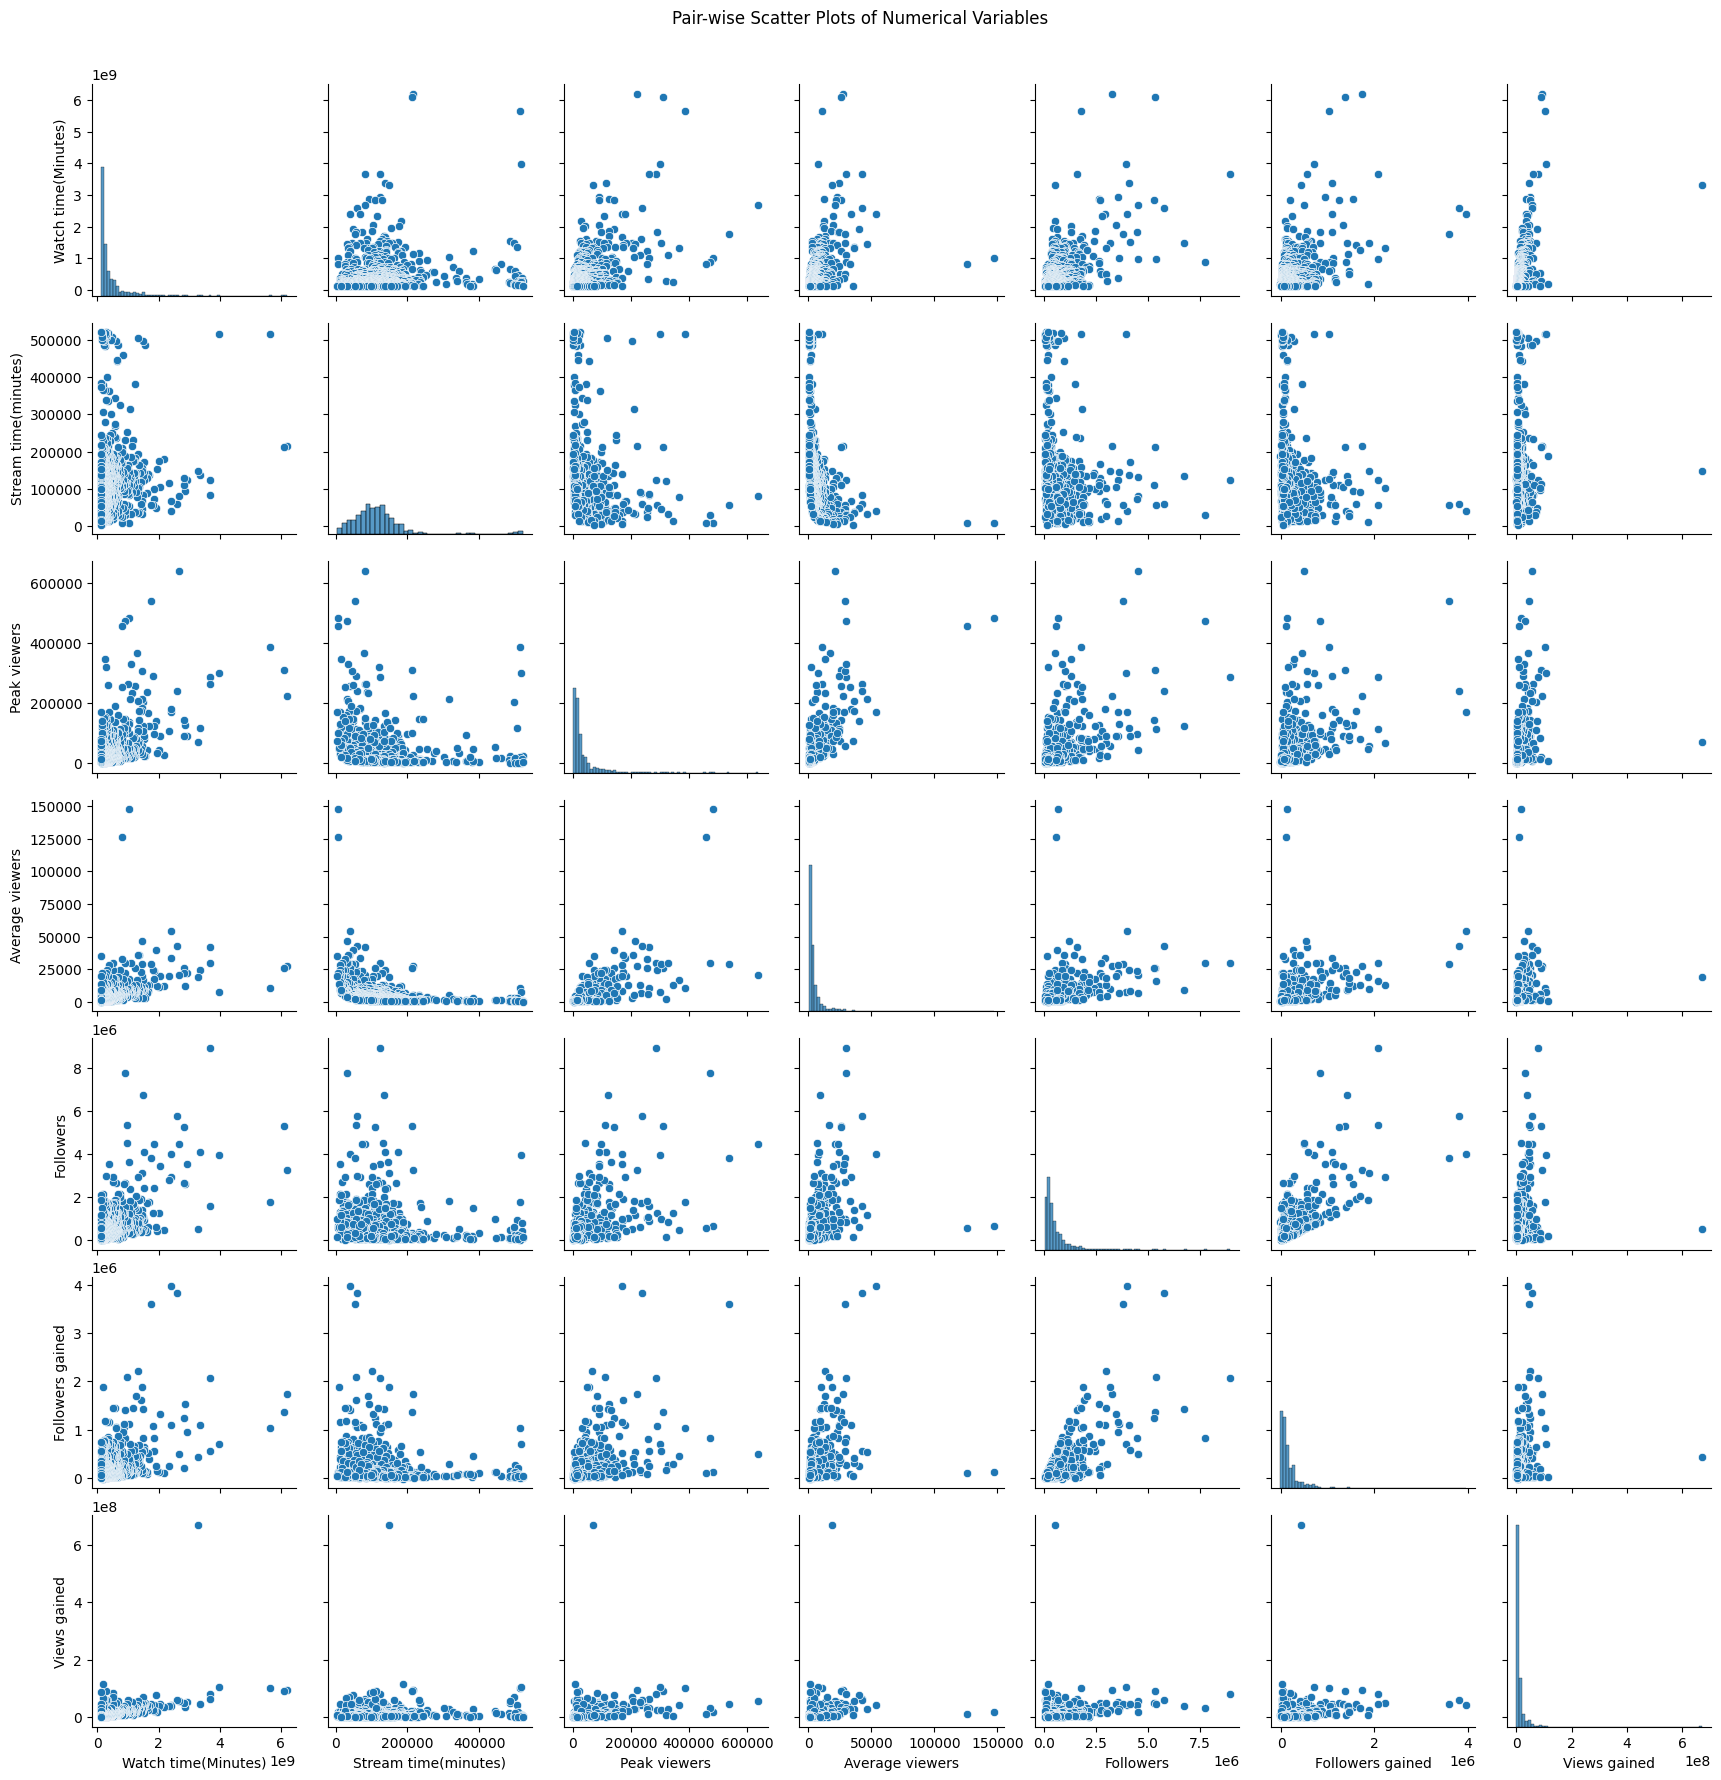

In [8]:
# Create a pair-wise scatter plot matrix
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair-wise Scatter Plots of Numerical Variables', y=1.02)
plt.show()

### Categorical vs. Categorical: Heatmap of Aggregated Counts
To show the relationship between two categorical variables, we can use a heatmap of their aggregated counts (a crosstab).
